In [481]:
import pandas as pd
pd.read_csv('stud_math.csv.xlw')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [ ]:
Проведем первичную обработку данных и получим информацию о датасете. 

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv.xlw')
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [484]:
display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Количество строк в датасете - 395, количество столбцов - 30. 
В датасете присутствуют данные типов float-12 значений, int-1 значение и object-17 значений.

Создадим функцию для заполнения пустых значений и применим её к слобцам, в которых число значений менее 395. 

In [485]:
def change_none(column):
    math[column] = math[column].apply(lambda x: None if pd.isna(x) == True else x)
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    change_none(col) 

Подсчитаем количество и тип значений для каждого столбца.

In [486]:
def count_values(column1):
    print(math[column1].value_counts())
for col in ['school','age','sex','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
'freetime', 'goout', 'health', 'absences', 'score']:
    count_values(col) 

GP    349
MS     46
Name: school, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: Pstatus, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64


Проанализируем полученные данные. 

Предстоит произвести операции:
1. Устранить выброс в Fedu ( заменить 40  на 4)
2. В столбце studytime, granular присутствуют отрицательные данные, скорее всего их придется исключить
3. Устранить выброс в стобце famrel (-1 заменить на 1)

In [436]:
#Устаним выброс в Fedu
math.Fedu = math.Fedu.apply(lambda x: 4.0 if x == 40.0 else x)

In [437]:
#Удалим столбец studytime, granular
math.drop(['studytime, granular'], inplace = True, axis = 1)

In [438]:
#Устраним выброс в famrel
math.famrel = math.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

In [487]:
#Проверим, что выбросы устранены
for col in ['school','age','sex','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
'freetime', 'goout', 'health', 'absences', 'score']:
    count_values(col) 

GP    349
MS     46
Name: school, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: Pstatus, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64


Для численных значений построим распределение признаков и проверим на выбросы. 

In [ ]:
import matplotlib.gridspec as gridspec

fg = plt.figure(figsize=(9, 7), constrained_layout=True)
gs = gridspec.GridSpec(ncols=1, nrows=3, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])


plt.hist(math.age, bins =4)
fig_ax_1.set_title('Age')
fig_ax_2 = fg.add_subplot(gs[1, 0])
plt.hist(math.traveltime, bins =4)
fig_ax_2.set_title('Travel time')
fig_ax_3 = fg.add_subplot(gs[2, 0])
plt.hist(math.studytime, bins =4)
fig_ax_3.set_title('Study time')
 

In [488]:
print('В столбце Age выбросы отсутствуют:')
math.age.describe()

В столбце Age выбросы отсутствуют:


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [489]:
print('В столбце traveltime выбросы отсутствуют:')
math.traveltime.describe()

В столбце traveltime выбросы отсутствуют:


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [490]:
print('В столбце studytime выбросы отсутствуют:')
math.studytime.describe()

В столбце studytime выбросы отсутствуют:


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Посмотрим на характер распределения оценок. Заметно, что присутствуют 37 человек с нулевыми баллами. Теоретически, набрать 0 баллов за экзамен возможно, поэтому не будем считать эти данные выбросами. 

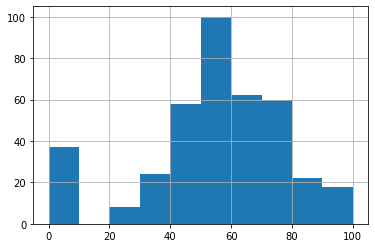

In [491]:
math.score.hist()

In [492]:
math.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Оценим характер распределения пропусков занятий.

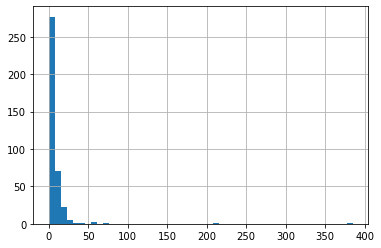

In [494]:
math.absences.hist(bins = 50)

Видно, что большинство студентов посещали занятия. 111 человек не пропустили ни одного занятия. В данном случае значение '0.0' (0 пропусков занятий) является положительным с точки зрения влияния на учебный процесс. Это стоит учитывать при оценке корреляции. 
Существенно отличающиеся от большинства значения 385 и 212 теоретически могут не являться выбросами, если чтуденты пропустили большинство занятий. Так как в данном случае невозможно установить причины таких значений, оставим их в датасете. 


In [493]:
math.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

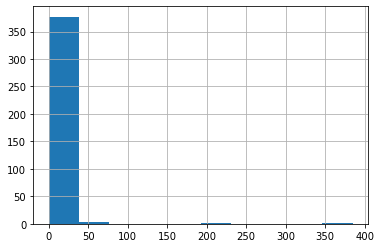

In [497]:
math.absences.hist(bins = 10)

Проанализируем следующие столбцы

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Health')

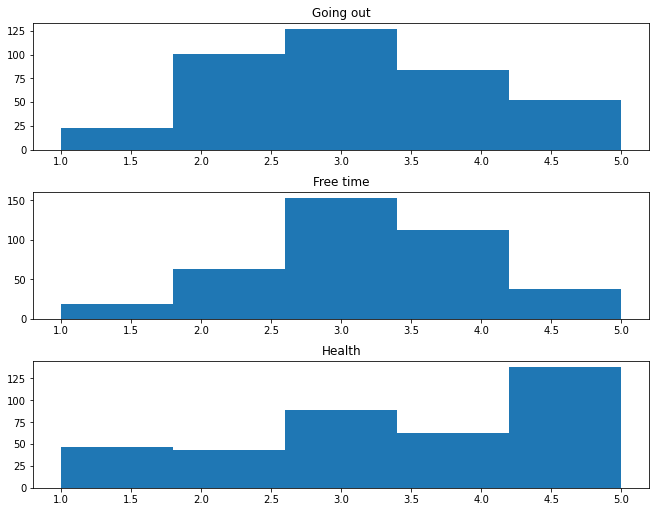

In [496]:
fg = plt.figure(figsize=(9, 7), constrained_layout=True)
gs = gridspec.GridSpec(ncols=1, nrows=3, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])
plt.hist(math.goout,bins=5)
fig_ax_1.set_title('Going out')
fig_ax_2 = fg.add_subplot(gs[1, 0])
plt.hist(math.freetime,bins=5)
fig_ax_2.set_title('Free time')
fig_ax_3 = fg.add_subplot(gs[2, 0])
plt.hist(math.health,bins=5)
fig_ax_3.set_title('Health')

Из гистограмм распределения видно, что столбцы goout, freetime и heаlth выбросов не содержат. 

Теперь проведем корреляционный анализ для числовых значений.  


In [441]:
math_corr = math.corr()
math_corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.083064,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.016222,-0.070460


Оценим, есть ли столбцы с коэффициентом корреляции близком к 1. 

In [442]:
math_corr[(math_corr.values >= 0.9)&(math_corr.values != 1)]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score


Кроме коэффициентов корреляции столбцов с самими собой (равных 1), других столбцов с высокой корреляцией нет. 

Оценим корреляцию значений столбцов со значениями результатов экзамена. 

In [443]:
math_corr[math_corr.index =='score']

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
score,-0.155726,0.213349,0.130923,-0.070559,0.115741,-0.344338,0.055305,0.019026,-0.129685,-0.07046,0.065283,1.0


Положительной корреляцией с результатами экзамена в основном обладают образование родителей и время, посвящаемое учебе, также отношения с ссемьей и свободное время после школы.
Интересно, что пропуски занятий по невыясненной причине положительно влияют на результаты экзамена. 
Отрицательно на результаты экзамена влияют внеучебные неудачи, частое проведние времени с друзьями, в меньшей степени - здоровье и время на дорогу. 

Перейдем к анализу номинативных переменных. 

Оценим распределение номинативных значений и их влиянияние на результаты экзамена с помощью boxplot. 

In [498]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

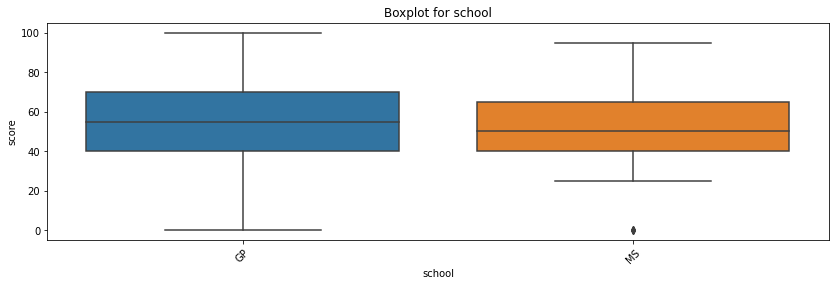

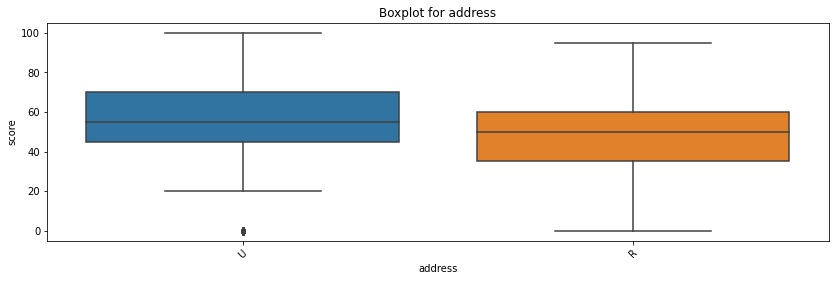

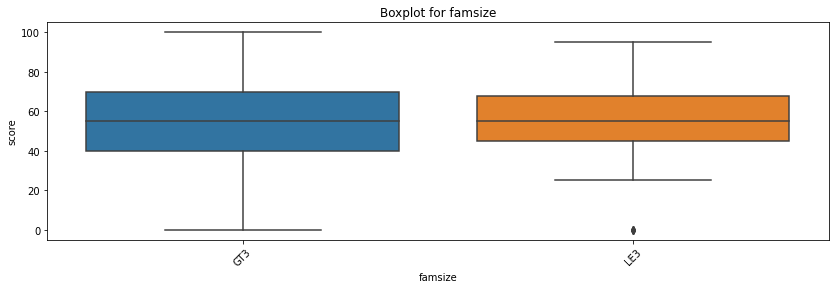

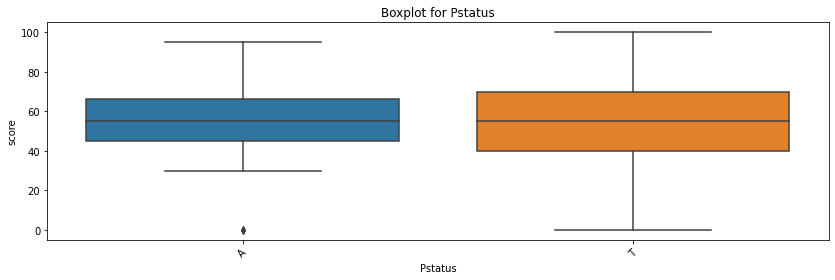

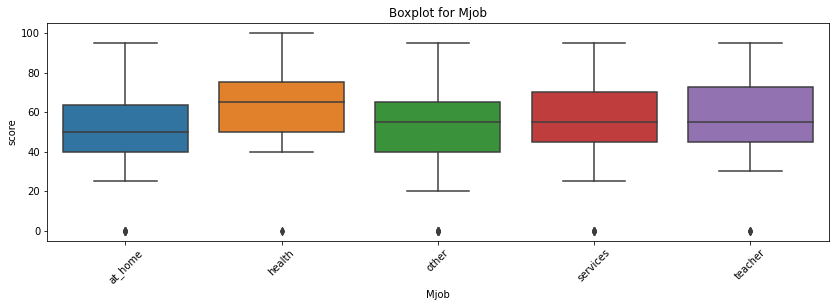

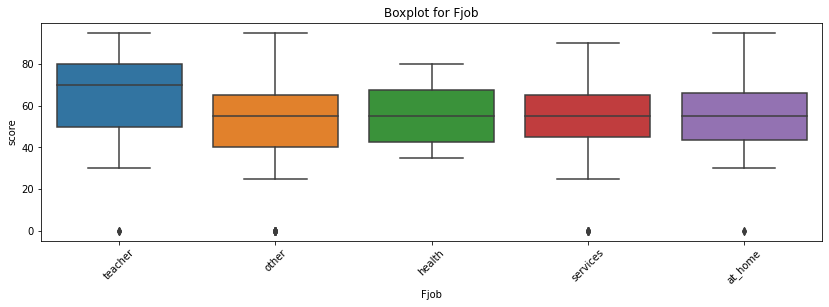

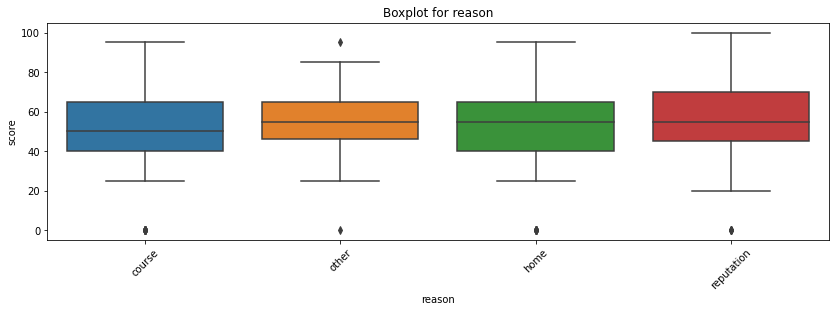

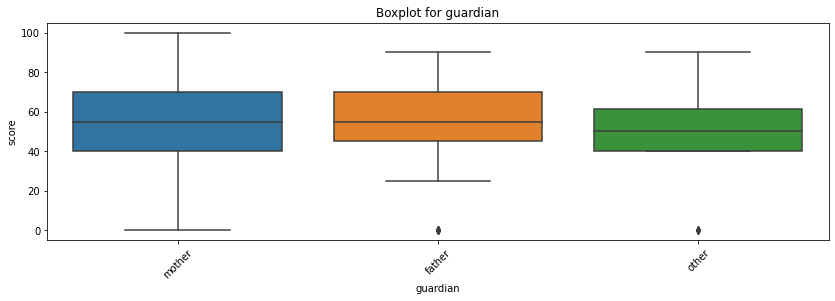

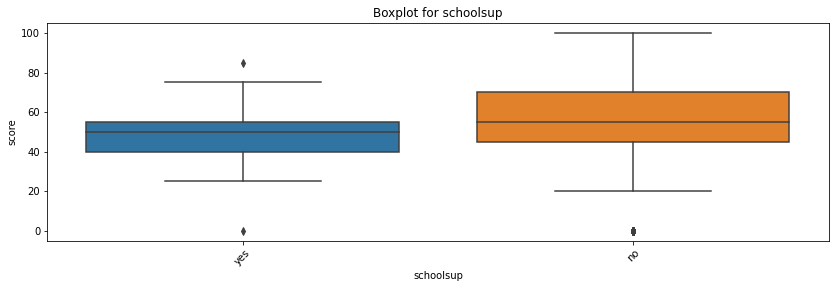

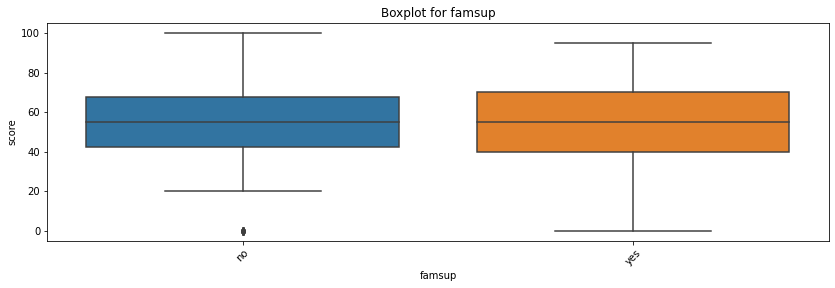

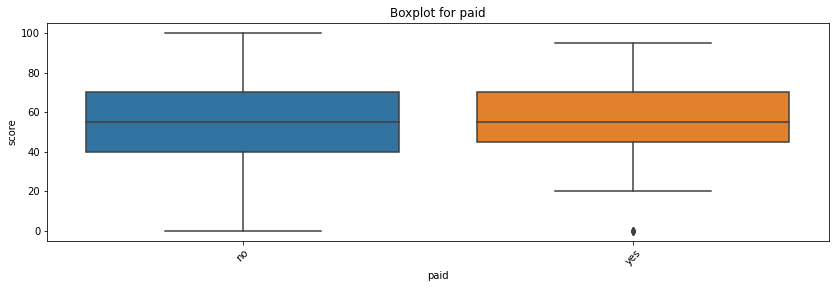

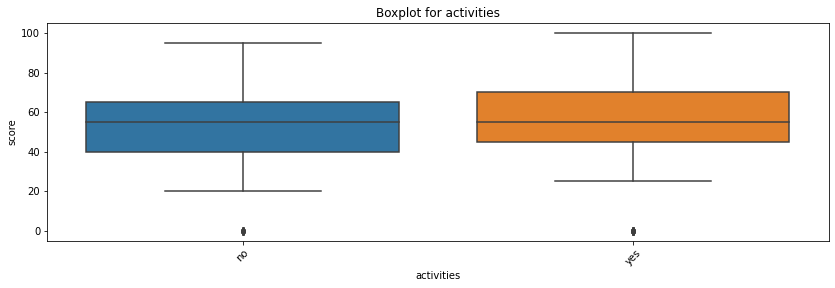

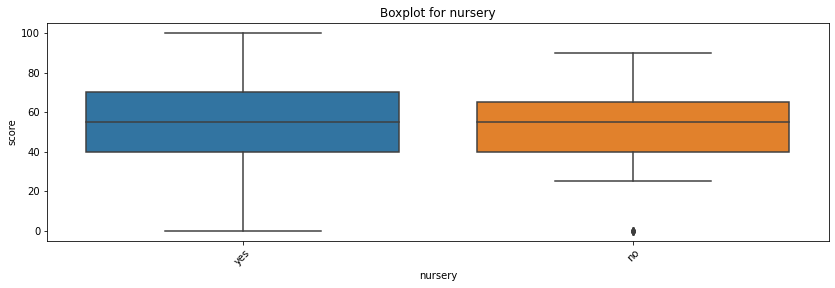

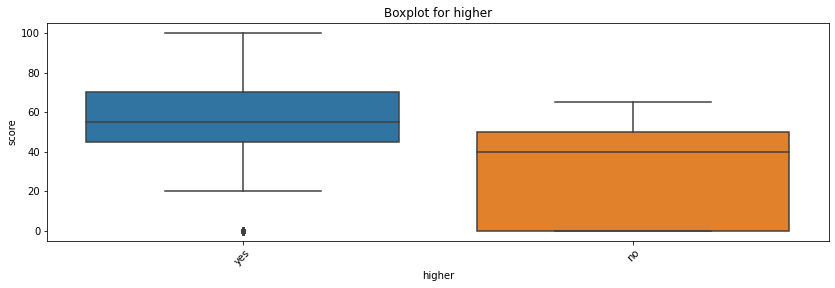

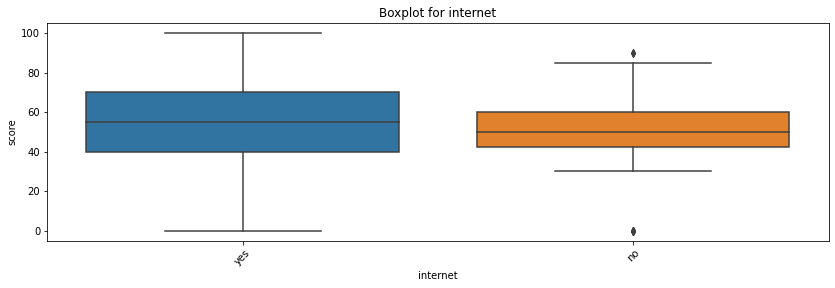

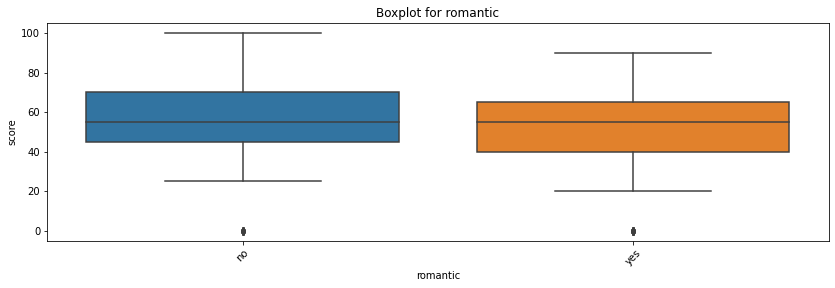

In [500]:
for col in ['school','address', 'famsize', 'Pstatus',
'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Из визуального рассмотрения можно заключить, что в наибольшей мере на результаты экзамена влияет стремление к дальнейшему получению высшего образования. В меньшей степени - проживание в городе и наличие отца-учителя и матери - медика. Остальные номинативные переменные значительного влияния не оказывают. 


Проведем тест Стьюдента для оценки статистической разницы в распределении пизнаков. 

In [501]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
    
    

In [502]:
for col in ['school','address', 'famsize', 'Pstatus',
'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Проанализировав данные, сформируем даатсет для дальнейшего построения модели. 

In [504]:
math_for_model = math.loc[:, ['age','sex','address', 'Medu', 'Fedu',
'Mjob', 'Fjob', 'studytime',
'failures', 'schoolsup','higher', 'famrel',
'freetime', 'goout', 'health', 'absences', 'score']]
math_for_model.head()

,age,sex,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,absences,score
0,18,F,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,17,F,U,1.0,1.0,at_home,other,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,15,F,U,1.0,1.0,at_home,other,2.0,3.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,15,F,U,4.0,2.0,health,None,3.0,0.0,no,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,16,F,U,3.0,3.0,other,other,2.0,0.0,no,yes,4.0,3.0,2.0,5.0,4.0,50.0
